Based on Aniruddha Karajgi: https://towardsdatascience.com/how-neural-networks-solve-the-xor-problem-59763136bdd7

https://github.com/Polaris000/BlogCode/blob/main/XOR_Perceptron/xorperceptron.ipynb

In case you wish more code resources:
https://towardsdatascience.com/coding-a-2-layer-neural-network-from-scratch-in-python-4dd022d19fd2

In [1]:
import numpy as np
# import random as rd
import matplotlib.pyplot as plt

In [2]:
# plt.rcParams["figure.figsize"] = [10, 5]

In [3]:
class MLP:
    """
    train_data: Input data (XOR case: 4x2 matrix)

    target: Expected outputs (XOR case: 4x1 matrix)

    lr: the learning rate.

    num_epochs: the number of times the training data goes through the model while training

    num_input: the number of nodes in the input layer of the MLP. Not considering the bias. (2nd dimension of input).
        
    num_hidden: the number of nodes in the hidden layer of the MLP not considering the bias.

    num_output: the number of nodes in the output layer of the MLP. (2nd dimension of target).
    """
    def __init__(self, train_data, target, lr=0.001, num_epochs=100, num_batch=1, num_input=2, num_hidden=2,
                 num_output=1, stop_condition = 0.005):
        
        self.train_data = train_data
        self.target = target
        self.lr = lr
        self.num_epochs = num_epochs
        self.num_batch = num_batch
        self.stop_condition = stop_condition

        # initialize weights and biases randomly, values between -0.1 and 0.1
        self.weights_01 = np.random.uniform(size=(num_input, num_hidden))/5 - 0.1 # weights between input and hidden layer
        self.weights_12 = np.random.uniform(size=(num_hidden, num_output))/5 - 0.1 ## weights between hidden and output layer
        
        self.b01 = np.random.uniform(size=(1,num_hidden))/5 - 0.1 # biases for the hidden layer
        self.b12 = np.random.uniform(size=(1,num_output))/5 - 0.1 # biases for the output layer

        self.losses = []
        self.actual_output = []
        self.desired_output = []
        
    def update_weights(self):
        
        # Calculate the root mean square error of the mean error of the num_batch patterns in a single run
        # I BELIEVE THE ERROR IS HERE. I WAS NOT USING THE CORRECT VECTORS FOR THE
        # BATCH RUNNING PART
        loss = np.sqrt(0.5 * error_term ** 2)
        self.losses.append(np.mean(loss))
        
        self.actual_output.append(self.output_final)
        self.desired_output.append(self.permutes_target)

        # the gradient for the output layer weights
        auxiliary = error_term * (1 - np.tanh(self.output_final)**2)
        grad12 = np.matmul(self.hidden_out.T, auxiliary) # Mismatch in dimensions, 1 with 4.

        # the gradient for the hidden layer weights
        grad01 = np.matmul(self.permutes_train_data.T, (auxiliary * self.weights_12.T) * (1 - np.tanh(self.hidden_out)**2))

        # updating the weights by the learning rate times their gradient
        self.weights_01 += self.lr * grad01 # ERROR HERE, grad01 of shape (1, 1, 100)
        self.weights_12 += self.lr * grad12

        # update the biases the same way
        self.b01 += np.sum(self.lr * ((error_term * (1 - np.tanh(self.output_final)**2)) * self.weights_12.T) * (1 - np.tanh(self.hidden_out)**2), axis=0)
        self.b12 += np.sum(self.lr * error_term * (1 - np.tanh(self.output_final)**2), axis=0)

    def forward(self, batch): # Forward pass through network. Implementation of Y = WX + bias
        # I BLEIEVE THE ERROR IS HERE. THIS IS NOT A BATCH. THIS IS A SINGLE ELEMENT OF THE WHOLE BATCH!
        self.hidden_ = np.dot(batch, self.weights_01) + self.b01
        self.hidden_out = np.tanh(self.hidden_)

        self.output_ = np.dot(self.hidden_out, self.weights_12) + self.b12
        self.output_final = np.tanh(self.output_)

        return self.output_final
    
    def classify(self, datapoint): # Determines a class for each datapoint.

        datapoint = np.transpose(datapoint)

        if self.forward(datapoint) >= 0.5:
            return 1

        return 0

    def train(self): #Trains and uses 2 stopping criteria: runs through the data num_epoch times and small error.
        # Modified for batch learning.
        banner = False
        
        for i in range(self.num_epochs*self.num_batch): # Total learning steps
            
            # Permutation of indices of train data
            indices = [i for i in range(len(self.train_data))]
            permute_i = np.random.permutation(indices)

            # Chooses num_batch entries of train_data and their corresponding target values
            self.permutes_train_data = np.asarray([self.train_data[i] for i in permute_i[:self.num_batch]])
            self.permutes_target = np.asarray([self.target[i] for i in permute_i[:self.num_batch]])
            
            # Starts the learning
            self.forward(self.permutes_train_data)
            
            if (i+1)%self.num_batch ==0: # We only want to update the weights when the batch has been run
                self.update_weights() 
                
#             if self.losses[i] <= self.stop_condition:
#                 print("Learning condition achieved: Error less than ", self.stop_condition," in cycle ",i)
#                 banner = True
#                 break
                
        if banner == False:      
            print("Learning condition achieved: ", self.num_epochs*self.num_batch, " learn steps run.")

1. Initialize weights, time step and learning parameters.
2. Present a randomly drawn training vector x^k to the network, propagate through the current weights until the activation reaches the output layer.
3. Compute the deltas for the output layer for that training pattern.
4. Compute the deltas for the hidden layers.
5. Do 2-4 for all training samples in the batch.
6. Update all the weights in the network.
7. Increment to the next time step. If training reaches a stopping criterion (use at least 2), stop. Otherwise go to step 2.

In [3]:
train_data_xor = np.asarray([[0, 0], [0, 1], [1, 0], [1, 1]])
target_xor = np.asarray([[0], [1], [1], [0]])

In [7]:
train_data = train_data_xor
target = target_xor

# Initializes learning parameters
lr=0.001
num_epochs=100
num_batch=1
num_input=2
num_hidden=2
num_output=1
stop_condition = 0.005
banner = False
K = 1 # number of batch runs

train_error_history = []
test_error_history = []
weights_01_history = []
weights_12_history = []
    
# Initializes weights
weights_01 = np.random.uniform(size=(num_input, num_hidden))/5 - 0.1 # weights between input and hidden layer
weights_12 = np.random.uniform(size=(num_hidden, num_output))/5 - 0.1 ## weights between hidden and output layer
        
b01 = np.random.uniform(size=(1,num_hidden))/5 - 0.1 # biases for the hidden layer
b12 = np.random.uniform(size=(1,num_output))/5 - 0.1 # biases for the output layer

#Initializes deltas
grad12 = np.zeros()
grad01 = 
cycles = 10
for i in range(cycles):
    
    # Permutation of indices of train data
    indices = [i for i in range(len(train_data))]
    permute_i = np.random.permutation(indices)
    
    # Chooses num_batch entries of train_data and their corresponding target values
    permutes_train_data = np.asarray([train_data[i] for i in permute_i[:num_batch]])
    permutes_target = np.asarray([target[i] for i in permute_i[:num_batch]])
    
    for k in range(K): # Batch learning
        
        batch = permutes_train_data[k]
        batch_target = permutes_target[k]
        
        # 2. Propagate through the current weights until the activation reaches the output layer. Forward run
        # Implementation of Y = WX + bias
        hidden_ = np.dot(batch, weights_01) + b01
        hidden_out = np.tanh(hidden_)

        output_ = np.dot(hidden_out, weights_12) + b12
        output_final = np.tanh(output_)
        
        # 3. Compute the deltas for the output layer for that training pattern.
        # 4. Compute the deltas for the hidden layers.
        # The network obtains the outputs and thus the errors of each element of the batch
        
        # Calculate the root mean square error of the mean error of the num_batch patterns in a single run
        error_term = (batch_target - output_final)
        loss = np.sqrt(0.5 * error_term ** 2)
        
        # the gradient for the output layer weights, addedd to the previous delta/grad value
        auxiliary = error_term * (1 - np.tanh(output_final)**2)
        grad12 += np.matmul(hidden_out.T, auxiliary) # Mismatch in dimensions, 1 with 4. In previous part

        # the gradient for the hidden layer weights, addedd to the previous delta/grad value
        grad01 += np.matmul(batch.T, (auxiliary * weights_12.T) * (1 - np.tanh(hidden_out)**2))
        
    # 6. Update all the weights in the network with the errors found. Learning phase. Backward run.   
    # updating the weights by the learning rate times their gradient
    weights_01 += lr * grad01
    weights_12 += lr * grad12
    weights_01_history.append(weights_01)
    weights_12_history.append(weights_12)

    # update the biases the same way
    b01 += np.sum(lr * ((error_term * (1 - np.tanh(output_final)**2)) * weights_12.T) * (1 - np.tanh(hidden_out)**2), axis=0)
    b12 += np.sum(lr * error_term * (1 - np.tanh(output_final)**2), axis=0)
    
    # THERE SHOULD BE A STEP HERE THAT WITH THE CURRENT WEIGHTS, THE TRAIN AND TEST ERRORS/LOSSES ARE EVALUATED
    # FOR THE TRAIN/TEST HISTORY
#     train_error_history.append()
#     test_error_history.append()
    
    # If learning condition achieved, break
#     if losses[i] <= stop_condition:
#         print("Learning condition achieved: Error less than ", stop_condition," in cycle ",i)
#         banner = True
#         break
                
#     if banner == False:      
#         print("Learning condition achieved: ", num_epochs*num_batch, " learn steps run.")


NameError: name 'grad12' is not defined

In [2]:
# HERE
def forward_(entry, weights_01, b01, weights_12, b12):

    hidden_ = np.dot(entry, weights_01) + b01
    hidden_out = np.tanh(hidden_)

    output_ = np.dot(hidden_out, weights_12) + b12
    output_final = np.tanh(output_)
    
    return output_final

In [4]:
train_data = np.asarray([[0, 0], [0, 1], [1, 0], [1, 1]])
target_xor = np.asarray([[0], [1], [1], [0]])

In [5]:
ejemplo = np.asarray([[[0, 0], [0, 1], [1, 0], [1, 1]]])
ejemplo.shape
ejemplo.reshape(4,2)

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [6]:
K = 3
mlp = MLP(train_data, target_xor, 0.02, 25000, K)
# train_data, target_values, Learning rate, number of cycles, num_batch=1, num_input=2, num_hidden=2, num_output=1
mlp.train()

Learning condition achieved:  75000  learn steps run.


Learning condition achieved:  75000  learn steps run.


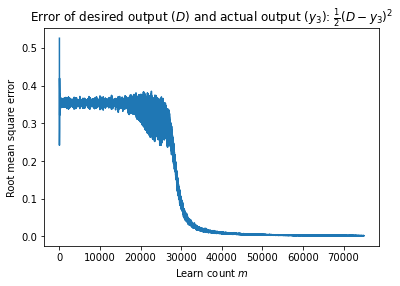

Learning condition achieved:  75000  learn steps run.


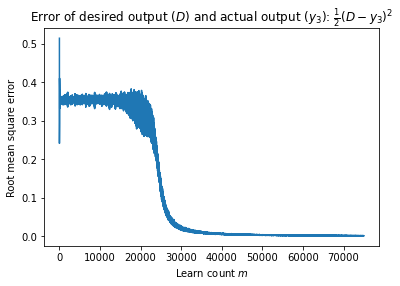

Learning condition achieved:  75000  learn steps run.


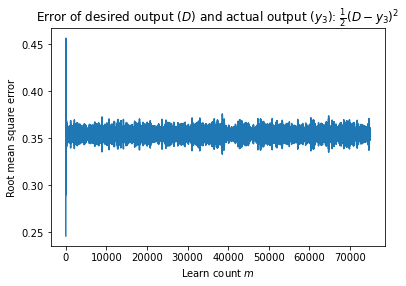

Learning condition achieved:  75000  learn steps run.


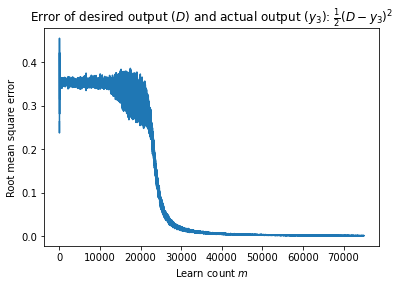

In [7]:
K = 3
for i in range(4):
    mlp = MLP(train_data, target_xor, 0.02, 25000, K, 2, 2, 1)
    # train_data, target_values, Learning rate, number of cycles, num_batch=1, num_input=2, num_hidden=2, num_output=1
    mlp.train()

    plt.plot([i*K for i in range(len(mlp.losses))], mlp.losses)
    plt.xlabel(r"Learn count $m$")
    plt.ylabel("Root mean square error")
    plt.title(r"Error of desired output ($D$) and actual output ($y_3$): $\frac{1}{2} (D-y_3)^2$")
            # Calculate the root mean square error of the mean error of 3 patterns in a single run

    plt.show()

# Why does this converge so beautifully when we use K=4, but if we use a smaller number, it does not always converge?

# Kayla suggests a smaller value than 4, it may not by "representative enough".

In [8]:
# print("Comparison between actual and desired output")
# for i in range(4):
#     plt.plot(np.asarray(mlp.actual_output)[:, i, 0], color= "r", label = "Actual output")
#     plt.plot(np.asarray(mlp.desired_output)[:, i, 0], color = "b", label = "Desired output")
#     plt.legend()
#     plt.show()

# Part 3: Training this to learn the function $f(x) = 1/x$ in $(0.1, 1.0)$

In [9]:
x = np.arange(0.1, 1, 0.001) # 900 values
f_x = [1/x[i] for i in range(len(x))]

# Permutation of data indices
indices = [i for i in range(len(x))]
permute_i = np.random.permutation(indices)

# Chooses num_batch entries of train_data and their corresponding target values
training_x = np.asarray([x[i] for i in permute_i[:200]])
training_fx = np.asarray([f_x[i] for i in permute_i[:200]])
test_x = np.asarray([x[i] for i in permute_i[200:300]])
test_fx = np.asarray([f_x[i] for i in permute_i[200:300]])

In [10]:
# Scale input to (-1, 1), now both the input and output are in the range (0.1, 1)
print(max(max(training_x), max(test_x)))
print(min(min(training_x), min(test_x)))

print(max(max(training_fx), max(test_fx)))
print(min(min(training_fx), min(test_fx)))

scaled_test_fx = np.asarray([[test_fx[i]/10] for i in range(len(test_fx))])
scaled_training_fx = np.asarray([[training_fx[i]/10] for i in range(len(training_fx))])

print(max(max(scaled_training_fx), max(scaled_test_fx)))
print(min(min(scaled_training_fx), min(scaled_test_fx)))

0.9990000000000008
0.101
9.900990099009901
1.0010010010010002
[0.99009901]
[0.1001001]


# There is a problem with our matrix multiplication and the size of the batch we are running. An error occurs when the batch size is greater than 1 in the $1/x$

Check this website: https://towardsdatascience.com/coding-a-2-layer-neural-network-from-scratch-in-python-4dd022d19fd2

Maybe the problem arises because the network thinks every single one of those entries corresponds to the same input pattern?

In [11]:
lr = 0.05
K  = 1 #100  #Batch size
cycles = 5000
# Maximum number of learn steps = K*cycles

# scaled_test_pairs
mlp_1x = MLP(training_x, scaled_training_fx, lr, cycles, K, 1, 10, 1)
# train_data, target_values, Learning rate, number of cycles, num_batch=1, num_input=2, num_hidden=2, num_output=1
mlp_1x.train()

Learning condition achieved:  5000  learn steps run.


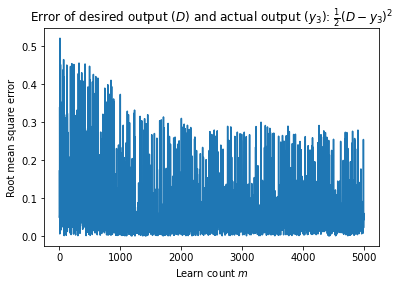

In [12]:
plt.plot([i*K for i in range(len(mlp_1x.losses))], mlp_1x.losses)
plt.xlabel(r"Learn count $m$")
plt.ylabel("Root mean square error")
plt.title(r"Error of desired output ($D$) and actual output ($y_3$): $\frac{1}{2} (D-y_3)^2$")
        # Calculate the root mean square error of the mean error of 3 patterns in a single run

plt.show()

# Now, you are trying in a single run to use the 100 patterns to the red and obtaining those errors. Shouldn't you be going 1 by 1?

# Wait! Now, how to run the test data for not changing the weight values? 